In [82]:
import math
import numpy as np

import numpy.linalg as npl
import matplotlib.pyplot as plt
#import matplotlib.animation as anim
from PIL import Image, ImageDraw


import cv2

In [93]:
from dataclasses import dataclass, field

@dataclass
class point():
    x: float = 0
    y: float = 0
    vx: float = 0
    vy: float = 0

@dataclass
class segment():
    ax: float = 0
    ay: float = 0
    bx: float = 0
    by: float = 0

@dataclass
class circle():
    cx: float = 0
    cy: float = 0
    r: float = 0

def circle_ro(cr,m):
    l=math.sqrt(abs((m.x-cr.cx)**2+(m.y-cr.cy)**2))
    ans=abs(l-cr.r)
    return(ans)
 
def segm_ro(ab,m) : 
    A=[ab.ax,ab.ay]
    B=[ab.bx,ab.by]
    E=[m.x,m.y]
    # vector AB 
    AB = [None, None] 
    AB[0] = B[0] - A[0]
    AB[1] = B[1] - A[1]
    # vector BP 
    BE = [None, None]
    BE[0] = E[0] - B[0]
    BE[1] = E[1] - B[1]
    # vector AP 
    AE = [None, None]
    AE[0] = E[0] - A[0]
    AE[1] = E[1] - A[1]
 
    # Variables to store dot product 
    # Calculating the dot product 
    AB_BE = AB[0] * BE[0] + AB[1] * BE[1]; 
    AB_AE = AB[0] * AE[0] + AB[1] * AE[1]; 
 
    # Minimum distance from point E to the line segment 
    ans = 0; 
    # Case 1 
    if (AB_BE > 0) :
        # Finding the magnitude 
        y = E[1] - B[1]; 
        x = E[0] - B[0]; 
        ans = math.sqrt(x * x + y * y); 
    # Case 2 
    elif (AB_AE < 0) :
        y = E[1] - A[1]; 
        x = E[0] - A[0]; 
        ans = math.sqrt(x * x + y * y); 
 
    # Case 3 
    else:
        # Finding the perpendicular distance 
        x1 = AB[0]; 
        y1 = AB[1]; 
        x2 = AE[0]; 
        y2 = AE[1]; 
        mod = math.sqrt(x1 * x1 + y1 * y1); 
        ans = abs(x1 * y2 - y1 * x2) / mod; 
    return ans

def intersect(ab,m):
    #Kоординаты концов первого отрезка
    x1_1=ab.ax
    y1_1=ab.ay
    x1_2=ab.bx
    y1_2=ab.by
    #Координаты концов второго отрезка
    x2_1 = m.x 
    y2_1 = m.y
    x2_2 = m.x+m.vx
    y2_2 = m.y+m.vy

    A1 = y1_1 - y1_2
    B1 = x1_2 - x1_1
    C1 = x1_1*y1_2 - x1_2*y1_1
    A2 = y2_1 - y2_2
    B2 = x2_2 - x2_1
    C2 = x2_1*y2_2 - x2_2*y2_1
    
    if B1*A2 - B2*A1 and A1:
        y = (C2*A1 - C1*A2) / (B1*A2 - B2*A1)
        x = (-C1 - B1*y) / A1
        if min(x1_1, x1_2) <= x <= max(x1_1, x1_2):
            print('Точка пересечения отрезков есть, координаты: ({0:f}, {1:f}).'.
                format(x, y))
        else:
            print('Точки пересечения отрезков нет.')
    elif B1*A2 - B2*A1 and A2:
        y = (C2*A1 - C1*A2) / (B1*A2 - B2*A1)
        x = (-C2 - B2*y) / A2
        if min(x1_1, x1_2) <= x <= max(x1_1, x1_2):
            print('Точка пересечения отрезков есть, координаты: ({0:f}, {1:f}).'.
                format(x, y))
        else:
            print('Точки пересечения отрезков нет.')
    else:
            print('Точки пересечения отрезков нет, отрезки ||.')

In [95]:
eps=4

p0=point(198,250,50,-50)
p1=point(252,150,50,-50)

obst0 = segment(100,100,400,200)
obst1 = segment(400,200,400,300)
obst2 = circle(250,250,50)

pnts=[p0,p1]
segs = [obst0,obst1]
cirs = [obst2]


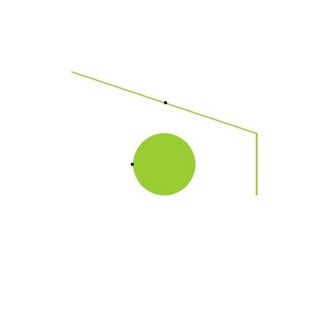

In [99]:
w=500
col3=(255,146,24)
col2=(0,0,0)
col1=(255,255,255)
images=[]
im=Image.new('RGB',(w,w),col1)
images.append(im)
draw=ImageDraw.Draw(im)

for obj in cirs:
    draw.ellipse((obj.cx-obj.r,obj.cy-obj.r,obj.cx+obj.r,obj.cy+obj.r),fill=(154, 205, 50))

for obj in segs:
    draw.line((obj.ax,obj.ay,obj.bx,obj.by),fill=(154, 205, 50), width=3)

for obj in pnts:
    draw.ellipse((obj.x-0.5*eps,obj.y-0.5*eps,obj.x+0.5*eps,obj.y+0.5*eps),fill=(0, 0, 0))

im.save('heh.jpg', quality=95)

image = cv2.imread('heh.jpg')
fig, axs = plt.subplots(1, 1, figsize=(4,4))
axs.imshow(image[:,:,::-1]) 
for ax in fig.axes:
    ax.axis("off")

In [108]:
#Поворот вектора скорости при отражении от кружочка
for p in pnts:
    for obj in cirs:
        print(p)
        print(obj)
        print('dist=',circle_ro(obj,p))
        if circle_ro(obj,p)<eps:
            print('turn')
            u = np.array([p.vx, p.vy, 0])   # velocity
            r = np.array([obj.cx-p.x, obj.cy-p.y, 0])   # radius
            t = np.cross(r, [0, 0, 1]) # tangent
        
            r_norm = np.sqrt(sum(r**2))     
            proj_of_u_on_r = (np.dot(u, r)/r_norm**2)*r
            t_norm = np.sqrt(sum(t**2))     
            proj_of_u_on_t = (np.dot(u, t)/t_norm**2)*t
            
            #print("Projection of velocity on radius is: ", proj_of_u_on_r)
            #print("Projection of velocity on tangent is: ", proj_of_u_on_t)
            u_new =  np.array([-proj_of_u_on_r[0]+proj_of_u_on_t[0], -proj_of_u_on_r[1]+proj_of_u_on_t[1], 0])
            print("Old velocity: [", u[0],u[1],"]")
            print("New velocity: [", u_new[0],u_new[1],"]")
            p=point(p.x,p.y,u_new[0],u_new[1])
        print('\n')



point(x=198, y=250, vx=50, vy=-50)
circle(cx=250, cy=250, r=50)
dist= 2.0
turn
Old velocity: [ 50 -50 ]
New velocity: [ -50.0 -50.0 ]


point(x=252, y=150, vx=50, vy=-50)
circle(cx=250, cy=250, r=50)
dist= 50.019998000399895




In [110]:
#Поворот вектора скорости при отражении от отрезка
for p in pnts:
    for obj in segs:
        print(p)
        print(obj)
        print('dist=',segm_ro(obj,p))
        if segm_ro(obj,p)<eps:
            print('turn')
            u = np.array([p.vx, p.vy, 0])   # velocity
            r = np.array([obj.bx-obj.ax, obj.by-obj.ay, 0])   # segment
            n = np.cross(r, [0, 0, 1]) # normal vector
        
            r_norm = np.sqrt(sum(r**2))     
            proj_of_u_on_r = (np.dot(u, r)/r_norm**2)*r
            n_norm = np.sqrt(sum(n**2))     
            proj_of_u_on_n = (np.dot(u, n)/n_norm**2)*n
            
            #print("Projection of velocity on segment is: ", proj_of_u_on_r)
            #print("Projection of velocity on normal vector is: ", proj_of_u_on_n)
            u_new =  np.array([proj_of_u_on_r[0]-proj_of_u_on_n[0], proj_of_u_on_r[1]-proj_of_u_on_n[1], 0])
            print("Old velocity: [", u[0],u[1],"]")
            print("New velocity: [", u_new[0],u_new[1],"]")
            p=point(p.x,p.y,u_new[0],u_new[1])
        print('\n')

point(x=198, y=250, vx=50, vy=-50)
segment(ax=100, ay=100, bx=400, by=200)
dist= 111.31217363792695


point(x=198, y=250, vx=50, vy=-50)
segment(ax=400, ay=200, bx=400, by=300)
dist= 202.0


point(x=252, y=150, vx=50, vy=-50)
segment(ax=100, ay=100, bx=400, by=200)
dist= 0.6324555320336758
turn
Old velocity: [ 50 -50 ]
New velocity: [ 9.999999999999996 70.0 ]


point(x=252, y=150, vx=9.999999999999996, vy=70.0)
segment(ax=400, ay=200, bx=400, by=300)
dist= 156.21779668142807


